In [1]:
import numpy as np
'''
file2matrix
将文本(TXT)转换成矩阵
来使用knn算法
'''
def file2matrix(filename):
    # 逐行读取文件
    fr=open(filename)
    arrayOLines=fr.readlines()
    # 统计行数
    numberOfLines=len(arrayOLines)
    returnMat=np.zeros( (numberOfLines, 3) )
    classLabelVector=[]
    index=0
    # 新增一个字典 三种标签 不喜欢 有点好感 非常有好感 分别对应 1 2 3 三个整数
    labels = {'didntLike':1,'smallDoses':2,'largeDoses':3} # 新增
    # 逐行解析数据
    for line in arrayOLines:
        line = line.strip() # strip可以去掉换行符
        listFromLine = line.split('\t') # 把数据间的回车符去掉
        returnMat[index,:] = listFromLine[0:3] # 形成矩阵表格
        classLabelVector.append(labels[listFromLine[-1]]) # 这里和书中有出入 实际上是将最后一行的内容转换成整型的标签 1 2 3
        index+=1
    return returnMat, classLabelVector

In [2]:
# 测试一下导入数据
filename = 'datingTestSet.txt'
Mat,datingLabels=file2matrix(filename)

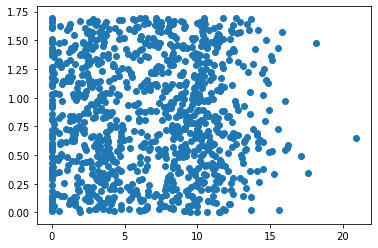

In [3]:
# 绘制散点图康康
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Mat[:,1], Mat[:,2]) # 将第二第三列数据作为横纵坐标
plt.show()

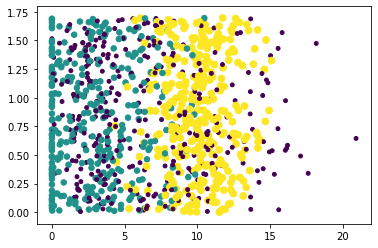

In [4]:
# 上面这个画完之后是不是感觉啥也没看出来？ 那就对了，因为确实看不出什么
# 接下来还是得把label打上 看起来就不太一样了
fig2 = plt.figure()
bx = fig2.add_subplot(111)
bx.scatter(Mat[:,1], Mat[:,2],
          15.0*np.array(datingLabels), 15.0*np.array(datingLabels))
plt.show()
# 嗯 有內味了

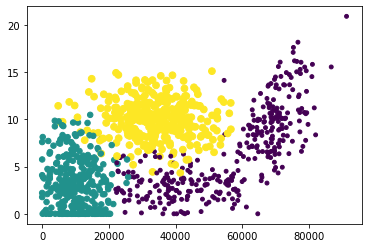

In [5]:
# 根据书上说的 这张图其实横纵坐标分别是“玩游戏耗时百分比”-- “每周消费的冰淇淋公升数”
# 这俩数据组合成特征向量就能做交友匹配还是太扯了 所以虽然能看清楚数据的分层 但是你很难得出什么结论
# 这时候还是要用上第一组数据
fig3 = plt.figure()
ax = fig3.add_subplot(111)
ax.scatter(Mat[:,0], Mat[:,1],
          15.0*np.array(datingLabels), 15.0*np.array(datingLabels))
plt.show()
# 这下看起来好多了
# BTW，这个第一列的数据是“每年获取的飞行常客里程数”（说人话就是：每年飞多少公里）

In [6]:
# 但是但是，我们为了让图表画的更完善一点 标题、数据轴标题、图例得有
# 所以最后优化一下绘制代码 封装成函数

def plt_scatter(Mat, Labels):
    classifyLabels = {'didntLike':1,'smallDoses':2,'largeDoses':3} # 分类的数据标签
    fig = plt.figure()
    axes = plt.add_subplot()
    for i in range(len(Labels)):
        type1 = Mat[Labels==1]
        type2 = Mat[Labels==2]
        type3 = Mat[Labels==3]
        
    axes.scatter

In [7]:
from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
'''
showdatas 绘制散点图

datingDataMat 数据矩阵
datingLabels 数据标签

'''
def showdatas(datingDataMat, datingLabels):
    #设置汉字格式
    font = FontProperties(fname=r"c:\windows\fonts\simkai.ttf", size=16)  ##需要查看自己的电脑是否会包含该字体
    #将fig画布分隔成1行1列,不共享x轴和y轴,fig画布的大小为(13,8)
    #当nrow=2,nclos=2时,代表fig画布被分为四个区域,axs[0][0]表示第一行第一个区域
    fig, axs = plt.subplots(nrows=2, ncols=2,sharex=False, sharey=False, figsize=(13,8))

    numberOfLabels = len(datingLabels)
    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        if i == 2:
            LabelsColors.append('orange')
        if i == 3:
            LabelsColors.append('red')

    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][0].scatter(x=datingDataMat[:,0], y=datingDataMat[:,1], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs0_title_text = axs[0][0].set_title(u'每年获得的飞行常客里程数与玩视频游戏所消耗时间占比',FontProperties=font)
    axs0_xlabel_text = axs[0][0].set_xlabel(u'每年获得的飞行常客里程数',FontProperties=font)
    axs0_ylabel_text = axs[0][0].set_ylabel(u'玩视频游戏所消耗时间占比',FontProperties=font)
    plt.setp(axs0_title_text, size=9, weight='bold', color='red')  
    plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black')  
    plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black') 

    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs1_title_text = axs[0][1].set_title(u'每年获得的飞行常客里程数与每周消费的冰激淋公升数',FontProperties=font)
    axs1_xlabel_text = axs[0][1].set_xlabel(u'每年获得的飞行常客里程数',FontProperties=font)
    axs1_ylabel_text = axs[0][1].set_ylabel(u'每周消费的冰激淋公升数',FontProperties=font)
    plt.setp(axs1_title_text, size=9, weight='bold', color='red')  
    plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black')  
    plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black') 

    #画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[1][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs2_title_text = axs[1][0].set_title(u'玩视频游戏所消耗时间占比与每周消费的冰激淋公升数',FontProperties=font)
    axs2_xlabel_text = axs[1][0].set_xlabel(u'玩视频游戏所消耗时间占比',FontProperties=font)
    axs2_ylabel_text = axs[1][0].set_ylabel(u'每周消费的冰激淋公升数',FontProperties=font)
    plt.setp(axs2_title_text, size=9, weight='bold', color='red')  
    plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black')  
    plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black') 
    #设置图例
    didntLike = mlines.Line2D([], [], color='black', marker='.',
                      markersize=6, label='didntLike')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.',
                      markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.',
                      markersize=6, label='largeDoses')
    #添加图例
    axs[0][0].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])
    #显示图片
    plt.show()

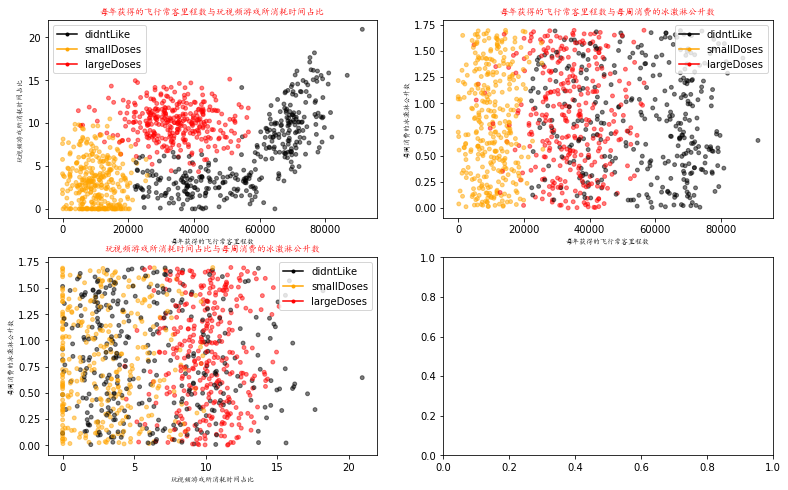

In [8]:
showdatas(Mat,datingLabels)
# 绘制出三幅两两变量的关系图
# 看起来分得最清楚的就是里程数--游戏耗时占比
# 接下来可以进一步去做kNN的分类

In [14]:
import operator
# 实现一下kNN 
def classify0(inX, dataSet, labels, k):
    #numpy函数shape[0]返回dataSet的行数
    dataSetSize = dataSet.shape[0]
    #在列向量方向上重复inX共1次(横向),行向量方向上重复inX共dataSetSize次(纵向)
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    #二维特征相减后平方
    sqDiffMat = diffMat**2
    #sum()所有元素相加,sum(0)列相加,sum(1)行相加
    sqDistances = sqDiffMat.sum(axis=1)
    #开方,计算出距离
    distances = sqDistances**0.5
    #返回distances中元素从小到大排序后的索引值
    sortedDistIndices = distances.argsort()
    #定一个记录类别次数的字典
    classCount = {}
    for i in range(k):
        #取出前k个元素的类别
        voteIlabel = labels[sortedDistIndices[i]]
        #dict.get(key,default=None),字典的get()方法,返回指定键的值,如果值不在字典中返回默认值。
        #计算类别次数
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    #python3中用items()替换python2中的iteritems()
    #key=operator.itemgetter(1)根据字典的值进行排序
    #key=operator.itemgetter(0)根据字典的键进行排序
    #reverse降序排序字典
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    print(sortedClassCount)
    #返回次数最多的类别,即所要分类的类别
    return sortedClassCount[0][0]

In [25]:
# 正则化
'''
这一步为什么需要？
因为在K近邻算法中，我们要求的是数据点之间的欧氏距离，涉及到2维以上的数据，若其中有一维或者多维的数据量级远高于其他维度，
那么他们的变化和差异对整个欧氏距离的影响是最大的，而其他的数据就被“稀释”了，相当于最后的值主要是由个别变量主导的
所以我们才需要对每一个数据进行“正则化”，也就是把他们的数量级降到同一个维度，保证各维度的变化对整个计算和预测的贡献是相当的。
'''

def autoNorm(dataSet):
    minVal = dataSet.min(0)
    maxVal = dataSet.max(0)
    ranges = maxVal - minVal
    #shape(dataSet)返回dataSet的矩阵行列数
    normDataSet = np.zeros(np.shape(dataSet))
    # 返回矩阵的行数
    m = dataSet.shape[0]
    # 创建一个最小值矩阵 并且用原始值减去最小值
    normDataSet = dataSet - np.tile(minVal,(m,1))
    normDataSet = normDataSet/np.tile(ranges,(m,1))
    return nromDataSet

In [19]:
# 上面处理了很多现成数据
# 接下来才到了正片内容
# 先实现classify函数吧
'''
classify  实现分类流程封装

包括：输入数据、导入训练数据、分类计算、返回结果
输入一个约会对象的三个数据 返回kNN判断结果

Parameters:
        gamingtime 游戏时间占比
        fmiles 飞行里程数
        icecream 冰淇淋公升数
        
Returns:
        分类类别
'''
def classify(gamingtime, fmiles, icecream):
    #输出结果
    resultList = ['讨厌','有些喜欢','非常喜欢']
    filename = 'datingTestSet.txt'
    Mat, Label = file2matrix(filename) # 打开文件导入数据
    inArr = np.array([fmiles, gamingtime, icecream])
    # 数据归一化
    classifyRes = classify0(inArr, Mat, Label,3) # 送入分类器
    print(resultList[classifyRes])

In [20]:
if __name__ == '__main__':
    classify(10,10,10)

[(2, 3)]
非常喜欢


In [ ]:
def datingClassTest():
    #打开的文件名
    filename = "datingTestSet.txt"
    #将返回的特征矩阵和分类向量分别存储到datingDataMat和datingLabels中
    datingDataMat, datingLabels = file2matrix(filename)
    #取所有数据的百分之十
    hoRatio = 0.10
    #数据归一化,返回归一化后的矩阵,数据范围,数据最小值
    normMat, ranges, minVals = autoNorm(datingDataMat)
    #获得normMat的行数
    m = normMat.shape[0]
    #百分之十的测试数据的个数
    numTestVecs = int(m * hoRatio)
    #分类错误计数
    errorCount = 0.0

    for i in range(numTestVecs):
        #前numTestVecs个数据作为测试集,后m-numTestVecs个数据作为训练集
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:], 
            datingLabels[numTestVecs:m], 4)
        print("分类结果:%s\t真实类别:%d" % (classifierResult, datingLabels[i]))
        if classifierResult != datingLabels[i]:
            errorCount += 1.0
    print("错误率:%f%%" %(errorCount/float(numTestVecs)*100))